In [47]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Load the data from the CSV file
file_path = r'C:\Users\Suliat\Documents\Dataset\Project Code\wustl-ehms-2020_with_attacks_categories.csv'
data = pd.read_csv(file_path)

In [49]:
data.describe()

,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,SrcGap,DstGap,SIntPkt,DIntPkt,SIntPktAct,...,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Label
count,16318.0,16318.000000,16318.000000,1.631800e+04,1.631800e+04,16318.0,16318.0,16318.000000,16318.000000,16318.000000,...,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000
mean,1111.0,496.650264,187.077706,2.118406e+05,7.102435e+04,0.0,0.0,10.946755,8.515423,1.286918,...,8156.308800,26.906815,97.808861,76.723741,142.846611,80.094190,75.443927,19.695551,0.258007,0.125383
std,0.0,28.584642,18.688525,7.942988e+04,4.530811e+04,0.0,0.0,101.230484,52.504560,62.123452,...,4709.735634,0.919766,1.496269,7.431914,8.493933,6.125289,6.609102,7.325856,0.103980,0.331163
min,1111.0,310.000000,120.000000,0.000000e+00,5.074470e+02,0.0,0.0,0.875000,0.730500,0.000000,...,1.000000,23.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000
25%,1111.0,496.000000,186.000000,1.990535e+05,6.635500e+04,0.0,0.0,3.792667,2.226000,0.000000,...,4077.250000,26.600000,98.000000,73.000000,142.000000,76.000000,73.000000,18.000000,0.200000,0.000000
50%,1111.0,496.000000,186.000000,2.366790e+05,7.889300e+04,0.0,0.0,4.191333,2.562250,0.000000,...,8156.500000,27.000000,98.000000,73.000000,144.000000,83.000000,73.000000,19.000000,0.300000,0.000000
75%,1111.0,496.000000,186.000000,2.615570e+05,8.719300e+04,0.0,0.0,4.984167,3.136375,0.000000,...,12234.750000,27.600000,98.000000,79.000000,148.000000,84.000000,79.000000,24.000000,0.300000,0.000000
max,1111.0,2298.000000,882.000000,1.134000e+06,3.938000e+06,0.0,0.0,9497.338000,2445.732000,3002.812000,...,16314.000000,29.200000,100.000000,194.000000,149.000000,95.000000,119.000000,73.000000,1.000000,1.000000


In [50]:
# Display the first few rows of the dataset and a summary of the data
data_head = data.head()
data_info = data.info()
data_head, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dir              16318 non-null  object 
 1   Flgs             16318 non-null  object 
 2   SrcAddr          16318 non-null  object 
 3   DstAddr          16318 non-null  object 
 4   Sport            16318 non-null  object 
 5   Dport            16318 non-null  int64  
 6   SrcBytes         16318 non-null  int64  
 7   DstBytes         16318 non-null  int64  
 8   SrcLoad          16318 non-null  float64
 9   DstLoad          16318 non-null  float64
 10  SrcGap           16318 non-null  int64  
 11  DstGap           16318 non-null  int64  
 12  SIntPkt          16318 non-null  float64
 13  DIntPkt          16318 non-null  float64
 14  SIntPktAct       16318 non-null  float64
 15  DIntPktAct       16318 non-null  int64  
 16  SrcJitter        16318 non-null  float64
 17  DstJitter   

(     Dir        Flgs     SrcAddr     DstAddr  Sport  Dport  SrcBytes  \
 0     ->   e          10.0.1.172  10.0.1.150  58059   1111       496   
 1     ->   e          10.0.1.172  10.0.1.150  58062   1111       496   
 2     ->   e          10.0.1.172  10.0.1.150  58065   1111       496   
 3     ->   e          10.0.1.172  10.0.1.150  58067   1111       496   
 4     ->   e          10.0.1.172  10.0.1.150  58069   1111       496   
 
    DstBytes   SrcLoad  DstLoad  ...  Temp  SpO2  Pulse_Rate  SYS  DIA  \
 0       186  276914.0  92305.0  ...  28.9     0           0    0    0   
 1       186  230984.0  76995.0  ...  28.9     0           0    0    0   
 2       186  218470.0  72823.0  ...  28.9    89         104    0    0   
 3       186  203376.0  67792.0  ...  28.9    89         104    0    0   
 4       186  235723.0  78574.0  ...  28.9    89         101    0    0   
 
    Heart_rate  Resp_Rate   ST  Attack Category  Label  
 0           0          0  0.0           normal      0  


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm

In [52]:
# Selecting a subset of features for simplicity and demonstration
# Using both biometric data and some network features for classification
selected_features = ['SrcBytes', 'DstBytes', 'SrcLoad', 'DstLoad', 'Dur', 'TotPkts', 'TotBytes', 'Load', 'Rate', 
                     'Temp', 'SpO2', 'Pulse_Rate', 'SYS', 'DIA', 'Heart_rate', 'Resp_Rate', 'ST', 'Label']

In [58]:
# Filter the dataset to selected features
filtered_data = data[selected_features]

In [59]:
# Normalize the numerical features
scaler = StandardScaler()
features = filtered_data.drop('Label', axis=1)
labels = filtered_data['Label']
features_scaled = scaler.fit_transform(features)

In [60]:
# Split the data into training 80% and testing 20% sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

In [61]:
# Create and configure the SVM model
svm_model = svm.SVC(kernel='rbf')

In [62]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, features_scaled, labels, cv=5)

In [64]:
# Print the cross-validation scores
print("Cross-validation scores for each fold: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())
print("Standard deviation of cross-validation scores: ", cv_scores.std())

Cross-validation scores for each fold:  [0.89675245 0.92830882 0.93903186 0.92552865 0.91786699]
Mean cross-validation score:  0.9214977570862853
Standard deviation of cross-validation scores:  0.014110961981665962


In [65]:
# Train the SVM model
svm_model.fit(X_train, y_train)

SVC()

In [66]:
# Evaluate the model on the testing set
accuracy = svm_model.score(X_test, y_test)
accuracy

0.9252450980392157

In [67]:
import time
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



In [68]:
# Start the training time measurement
start_time = time.time()



In [69]:
# Train the SVM model
svm_model.fit(X_train, y_train)

SVC()

In [70]:
# Calculate the training time
training_time = time.time() - start_time

In [71]:
# Predictions for the testing set
y_pred = svm_model.predict(X_test)

In [72]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [73]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [74]:
# Extracting True Positives (TP) and False Positives (FP) from the confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]

In [75]:
# Printing the results
print("SVM Model Performance Evaluation")
print("===================================")
print(f"Training Time: {training_time:.3f} seconds")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1:.2f}")
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print("Confusion Matrix:")
print(conf_matrix)
print("===================================")

SVM Model Performance Evaluation
Training Time: 3.200 seconds
Accuracy: 92.52%
Precision: 96.74%
Recall: 42.79%
F1 Score: 0.59
True Positives (TP): 178
False Positives (FP): 6
Confusion Matrix:
[[2842    6]
 [ 238  178]]


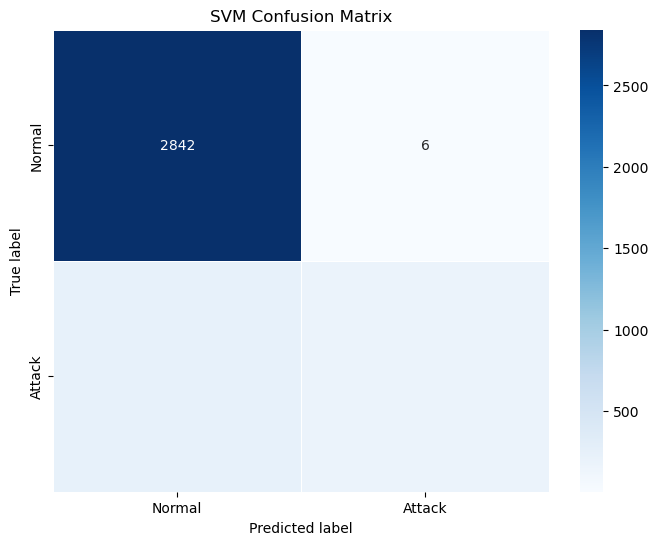

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.show()

# Define the confusion matrix data and class labels
conf_matrix = np.array([[2842,6],[238,178]])
class_names = ['Normal', 'Attack']

# Call the function with the confusion matrix
plot_confusion_matrix(conf_matrix, classes=class_names, title='SVM Confusion Matrix')

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

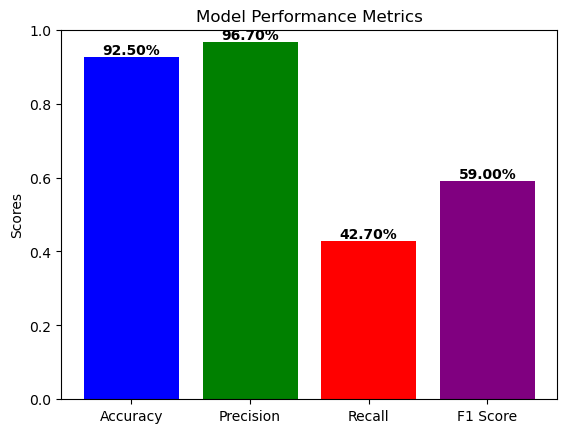

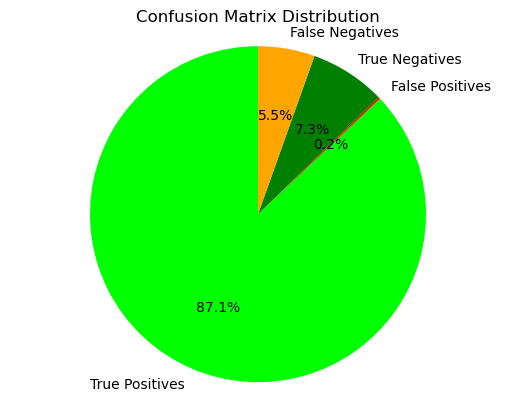

In [78]:
import matplotlib.pyplot as plt

# Metrics Data
metrics = {
    'Accuracy': 0.925,
    'Precision': 0.967,
    'Recall': 0.427,
    'F1 Score': 0.59
}

# Confusion Matrix Data
conf_matrix = {
    'True Positives': 2842,
    'False Positives': 6,
    'True Negatives': 238,
    'False Negatives': 178
}

# Function to plot metrics as bar chart with percentage values
def plot_metrics_bar_chart(metrics):
    fig, ax = plt.subplots()
    bars = ax.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Metrics')
    plt.ylim([0, 1])  # Assuming metrics are normalized between 0 and 1

    # Add value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom', color='black', fontweight='bold')

    plt.show()

# Function to plot confusion matrix as pie chart
def plot_confusion_matrix_pie_chart(conf_matrix):
    fig, ax = plt.subplots()
    ax.pie(conf_matrix.values(), labels=conf_matrix.keys(), autopct='%1.1f%%', startangle=90, colors=['lime', 'red', 'green', 'orange'])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Confusion Matrix Distribution')
    plt.show()

# Plotting the metrics bar chart
plot_metrics_bar_chart(metrics)

# Plotting the confusion matrix pie chart
plot_confusion_matrix_pie_chart(conf_matrix)